In [37]:
import sympy as sp

x, y = sp.symbols("x y")
a, b = sp.symbols("a b", positive=True)

# define the slope of the line
m = (b - a)*sp.Rational(1, 3)

f = a + m * x
# define the inverse function when looking from y direction
inverse = -1 / m * (y - a) + 3

# calculate Gx and Gy
Gx = sp.integrate(f, (x, 2, 3)) - sp.integrate(f, (x, 0, 1))
Gy = a * 3 + sp.integrate(inverse, (y, a, 1)) - sp.integrate(inverse, (y, 2, b))
# general form that has limitations in the symbolic calculations
# a_limits = sp.Piecewise((0, a < 0), (a, a <= 1), (1, a > 1))
# b_limits = sp.Piecewise((2, b < 2), (b, b <= 3), (3, b > 3))
# Gy = a_limits * 3 + sp.integrate(inverse, (y, a_limits, 1)) - sp.integrate(inverse, (y, 2, b_limits))

# Calculate orientation index
I = sp.simplify(Gy/Gx)

# verify that in the extreme case of 45 degrees gives 1.
print(f"Verification: {I.subs([(b, 3), (a, 0)]) == 1}")
assert I.subs([(b, 3), (a, 0)]) == 1
I.subs([(a, 0), (b, 3)]), I.subs([(a, 1), (b, 2)])


Verification: True


(1, 9/2)

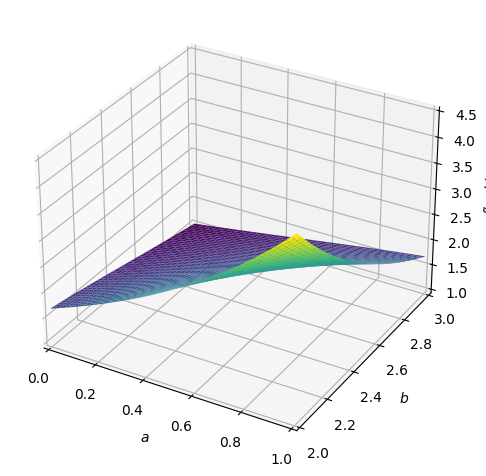

In [2]:
sp.plotting.plot3d(I, (a, 0, 1), (b, 2, 3))

### Analysis on the derivatives

If $\frac{\partial I}{\partial a}>0$ and $\frac{\partial I}{\partial b}<0$ over all the interval $a\in[0, 1]$ and $b\in[2, 3]$ it means that starting from the extreme value of $I(a=0, b=3)$ and making $a$ increase and $b$ decrease we will find always and ever increasing value of $I$ which implies that $I>1$ always.

##### Analysis of: $\frac{\partial I}{\partial a}>0$

In [3]:
E = sp.simplify(sp.diff(I, a))
Ia = E.func(*(sp.factor(term) for term in E.args))
Ia

9*(a*b + b**2 - 6*b + 5)/(2*(a - b)**3)

In [4]:
Ia.subs([(a, 0), (b, 3)]), Ia.subs([(a, 1), (b, 2)])

(2/3, 9/2)

In [5]:
Ia_change_sign = sp.solve(sp.numer(Ia), a)[0]
Ia_change_sign

-b + 6 - 5/b

In [6]:
# Ia does not change sign in the interval of b = [2, 3] \subset [1, 5]
sp.solve(Ia_change_sign)

[1, 5]

##### Analysis of: $\frac{\partial I}{\partial b}>0$

In [7]:
E = sp.simplify(sp.diff(I, b))
Ib = E.func(*(sp.factor(term) for term in E.args))
Ib

9*(-a**2 - a*b + 3*a + 3*b - 5)/(2*(a - b)**3)

In [8]:
Ib.subs([(a, 0), (b, 3)]), Ib.subs([(a, 1), (b, 2)])

(-2/3, -9/2)

In [9]:
Ib_change_sign = sp.solve(sp.numer(Ib), b)[0]
Ib_change_sign

(-a**2 + 3*a - 5)/(a - 3)

In [10]:
print("As all the roots are only complex numbers,",
      "the original function never vanishes when working on real numbers therefore",
      "from (-2/3, -9/2) ")
sp.solve(sp.numer(Ib_change_sign), a)[0]

As all the roots are only complex numbers, the original function never vanishes when working on real numbers thereforefrom (-2/3, -9/2) 


3/2 - sqrt(11)*I/2

### Quadratic

In [38]:
g = sp.symbols("g")
fq = g*x*(x-3)


Gx = sp.integrate(f+fq, (x, 2, 3)) - sp.integrate(f+fq, (x, 0, 1))
Gx

-2*a/3 + 2*b/3

In [46]:
import itertools
delta = sp.symbols("d", positive=True)
x_vertex = -sp.Poly(f+fq, x).all_coeffs()[1]/(2*g)
limits = list(itertools.chain(sp.solve(x_vertex, g),
                              sp.solve(x_vertex-3, g),
                              sp.solve((f+fq).subs(x, x_vertex), g),
                              sp.solve((f+fq).subs(x, x_vertex)-3, g)))
limits = [sp.simplify(l.subs(b, a+1+delta)) for l in limits]
limits

[d/9 + 1/9,
 -d/9 - 1/9,
 -2*sqrt(a)*sqrt(a + d + 1)/9 + 2*a/9 + d/9 + 1/9,
 2*sqrt(a)*sqrt(a + d + 1)/9 + 2*a/9 + d/9 + 1/9,
 2*a/9 + d/9 - 2*sqrt((a - 3)*(a + d - 2))/9 - 5/9,
 2*a/9 + d/9 + 2*sqrt((a - 3)*(a + d - 2))/9 - 5/9]

In [53]:
min([sp.Abs(sp.simplify(l.subs(b, a+1+delta)).subs(a, 0).subs(delta, 1)) for l in limits])

4/9 - 2*sqrt(3)/9

In [54]:
sp.N(min([sp.Abs(sp.simplify(l.subs(b, a+1+delta)).subs(a, 0).subs(delta, 1)) for l in limits]), 2)

0.060

In [69]:

sp.solve(f-y, x)

[3*(a - y)/(a - b)]

In [61]:
inverse_up, inverse_down = sp.solve(f+fq-y, x)

In [66]:
dGy = sp.simplify(sp.integrate(inverse_up-inverse, (y, a, 1)) - sp.integrate(inverse_up-inverse, (y, 2, b)))
dGy

Piecewise(((486*g**2*(-a**2 - 2*a*b + 6*a + b**2 - 5) + (a - b)*(a**2*sqrt(a**2 - 2*a*b - 18*a*g + b**2 + 18*b*g + 81*g**2) + a**2*sqrt(a**2 - 2*a*b + 18*a*g + b**2 - 18*b*g + 81*g**2) - a**2*sqrt(a**2 - 2*a*b - 18*a*g + b**2 - 18*b*g + 81*g**2 + 36*g) - a**2*sqrt(a**2 - 2*a*b - 18*a*g + b**2 - 18*b*g + 81*g**2 + 72*g) - 2*a*b*sqrt(a**2 - 2*a*b - 18*a*g + b**2 + 18*b*g + 81*g**2) - 2*a*b*sqrt(a**2 - 2*a*b + 18*a*g + b**2 - 18*b*g + 81*g**2) + 2*a*b*sqrt(a**2 - 2*a*b - 18*a*g + b**2 - 18*b*g + 81*g**2 + 36*g) + 2*a*b*sqrt(a**2 - 2*a*b - 18*a*g + b**2 - 18*b*g + 81*g**2 + 72*g) + b**2*sqrt(a**2 - 2*a*b - 18*a*g + b**2 + 18*b*g + 81*g**2) + b**2*sqrt(a**2 - 2*a*b + 18*a*g + b**2 - 18*b*g + 81*g**2) - b**2*sqrt(a**2 - 2*a*b - 18*a*g + b**2 - 18*b*g + 81*g**2 + 36*g) - b**2*sqrt(a**2 - 2*a*b - 18*a*g + b**2 - 18*b*g + 81*g**2 + 72*g) + 972*g**2*(a + b - 3) - 9*g*(6*a**2 - 6*a*b + 54*a*g - 2*a*sqrt(a**2 - 2*a*b + 18*a*g + b**2 - 18*b*g + 81*g**2) + 2*b*sqrt(a**2 - 2*a*b + 18*a*g + b**2 - 18*

In [68]:

dGy.subs(g, 0)

a**2/(2*(-a/3 + b/3)) + 3*a + 3*b + (1/2 - a)/(-a/3 + b/3) + (2 - 2*a)/(-a/3 + b/3) + 3*zoo*(a - b - sqrt(a**2 - 2*a*b + b**2)) - 9 - (-a*b + b**2/2)/(-a/3 + b/3)

In [67]:
sp.series(dGy, g, 0)

(a**2*(-9*a/(a**2 - 2*a*b + b**2) + 9*b/(a**2 - 2*a*b + b**2))*sqrt(a**2 - 2*a*b + b**2)/324 + a**2*(9*a/(a**2 - 2*a*b + b**2) - 9*b/(a**2 - 2*a*b + b**2))*sqrt(a**2 - 2*a*b + b**2)/324 - a**2*sqrt(a**2 - 2*a*b + b**2)*(-9*a/(a**2 - 2*a*b + b**2) - 9*b/(a**2 - 2*a*b + b**2) + 18/(a**2 - 2*a*b + b**2))/324 - a**2*sqrt(a**2 - 2*a*b + b**2)*(-9*a/(a**2 - 2*a*b + b**2) - 9*b/(a**2 - 2*a*b + b**2) + 36/(a**2 - 2*a*b + b**2))/324 - a**2/6 - a*b*(-9*a/(a**2 - 2*a*b + b**2) + 9*b/(a**2 - 2*a*b + b**2))*sqrt(a**2 - 2*a*b + b**2)/162 - a*b*(9*a/(a**2 - 2*a*b + b**2) - 9*b/(a**2 - 2*a*b + b**2))*sqrt(a**2 - 2*a*b + b**2)/162 + a*b*sqrt(a**2 - 2*a*b + b**2)*(-9*a/(a**2 - 2*a*b + b**2) - 9*b/(a**2 - 2*a*b + b**2) + 18/(a**2 - 2*a*b + b**2))/162 + a*b*sqrt(a**2 - 2*a*b + b**2)*(-9*a/(a**2 - 2*a*b + b**2) - 9*b/(a**2 - 2*a*b + b**2) + 36/(a**2 - 2*a*b + b**2))/162 + a*sqrt(a**2 - 2*a*b + b**2)/9 + a/2 + b**2*(-9*a/(a**2 - 2*a*b + b**2) + 9*b/(a**2 - 2*a*b + b**2))*sqrt(a**2 - 2*a*b + b**2)/324 + b**2

In [ ]:


# define the slope of the line
m = (b - a)*sp.Rational(1, 3)

y = 3+-3
y/g = x**2 - x*3

f = a + m * x + g*x(x-3)
# define the inverse function when looking from y direction
inverse = -1 / m * (y - a) + 3 + y/g

# calculate Gx and Gy
Gx = sp.integrate(f+fq, (x, 2, 3)) - sp.integrate(f+fq, (x, 0, 1))
Gy = a * 3 + sp.integrate(inverse, (y, a, 1)) - sp.integrate(inverse, (y, 2, b))
# general form that has limitations in the symbolic calculations
# a_limits = sp.Piecewise((0, a < 0), (a, a <= 1), (1, a > 1))
# b_limits = sp.Piecewise((2, b < 2), (b, b <= 3), (3, b > 3))
# Gy = a_limits * 3 + sp.integrate(inverse, (y, a_limits, 1)) - sp.integrate(inverse, (y, 2, b_limits))

# Calculate orientation index
I = sp.simplify(Gy/Gx)

# verify that in the extreme case of 45 degrees gives 1.
print(f"Verification: {I.subs([(b, 3), (a, 0)]) == 1}")
assert I.subs([(b, 3), (a, 0)]) == 1
I.subs([(a, 0), (b, 3)]), I.subs([(a, 1), (b, 2)])